# 1. Deep Neural Networks Binary Classification Script with Transfer Learning

## Environment

In [19]:
# 1. Packages:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import warnings
import datetime
import glob
import shutil
import matplotlib.pyplot as plt
from sklearn import metrics
warnings.filterwarnings('ignore')

# 2. Import functions:
%run Functions.ipynb

# 3. Activate GPU:
gpu = activate_gpu()

# 4. Set working directory:
working_directory = r"D:\GitHub\GitHub_Deep_Neural_Networks_Python"
os.chdir(working_directory)

# 5. Set dataset directory:
dataset_directory = r"D:\GitHub\GitHub_Deep_Neural_Networks_Python\Datasets\Cats_And_Dogs"

# 6. Set model name:
model_name = "ResNet50"

Imported functions:
- activate_gpu()
- generate_directories()
- build_binary_classification_transfer_learning_model()
- build_traininig_image_data_generators_flow_from_directory()
- build_callbacks()
- optimize_model()
- visualize_loss_accuracy_binary_classification()
- build_evaluation_image_data_generators_flow_from_directory()
- evaluate_binary_classification_model()
- remove_spare_models()
- remove_logs_folder()
- remove_history_logger()
- comprehensive_binary_classification_evaluation()

1 Physical GPUs, 1 Logical GPUs


## Parameters

In [2]:
parameters = dict(shuffle = True,
                  batch_size = 16,
                  class_mode = "binary",
                  monitor = "val_binary_accuracy",
                  epochs = 10,
                  verbose = 1,
                  save_best_only = True,
                  restore_best_weights = True,
                  early_stopping_patience = 5)

augmentation_parameters = dict(horizontal_flip = True,
                               vertical_flip = True)

## Directories

In [3]:
directories = generate_directories(model_name = model_name,
                                   model_type = "Binary",
                                   working_directory = working_directory,
                                   dataset_directory = dataset_directory)

Folder D:\GitHub\GitHub_Deep_Neural_Networks_Python\ResNet50 already exist
Folder D:\GitHub\GitHub_Deep_Neural_Networks_Python\ResNet50\Binary already exist


## Build & Compile Model 

In [4]:
model = build_binary_classification_transfer_learning_model(model_name = model_name)
model.compile(loss = tf.keras.losses.binary_crossentropy,
              optimizer = tf.keras.optimizers.Adam(),
              metrics = tf.keras.metrics.BinaryAccuracy())

## Build Traininig Image Data Generators

In [5]:
data_generators = build_traininig_image_data_generators_flow_from_directory(model = model,
                                                                            directories = directories,
                                                                            parameters = parameters,
                                                                            augmentation_parameters = augmentation_parameters)

Augmentation parameters:
-> horizontal_flip : True
-> vertical_flip : True
-> rescale : 0.00392156862745098

Found 9000 images belonging to 2 classes.
Found 3000 images belonging to 2 classes.


## Callbacks

In [6]:
callbacks = build_callbacks(directories = directories,
                            parameters = parameters)

## Optimize Model

In [7]:
history = optimize_model(model = model,
                         data_generators = data_generators,
                         parameters = parameters,
                         callbacks = callbacks)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
  1/563 [..............................] - ETA: 0s - loss: 0.8954 - binary_accuracy: 0.6250WARNING:tensorflow:From C:\Users\admin\anaconda3\envs\GPU_ML_TF\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
563/563 [==============================] - ETA: 0s - loss: 0.5274 - binary_accuracy: 0.7620
Epoch 00001: val_binary_accuracy improved from -inf to 0.50233, saving model to D:\GitHub\GitHub_Deep_Neural_Networks_Python\ResNet50\Binary\keras_model.weights.01-0.5023-0.7195.hdf5
563/563 [==============================] - 73s 130ms/step - loss: 0.5274 - binary_accuracy: 0.7620 - val_loss: 0.7195 - val_binary_accuracy: 0.5023
Epoch 2/10
563/563 [==============================] - ETA: 0s - loss: 0.3684 - binary_accuracy: 0.8424

## Visualize results

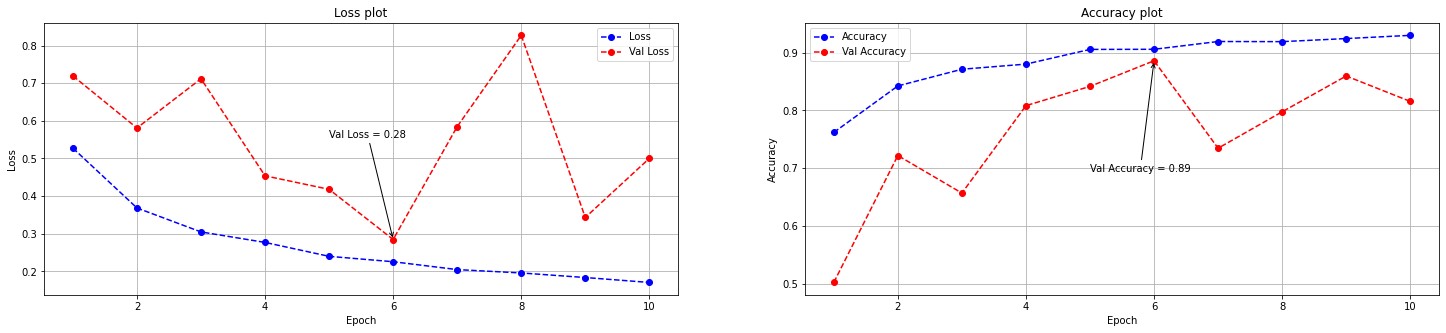

In [8]:
visualize_loss_accuracy_binary_classification(history = history)

## Remove Spare Models

In [9]:
remove_spare_models(directory = directories["model_type_directory"])

Remove file: D:\GitHub\GitHub_Deep_Neural_Networks_Python\ResNet50\Binary\keras_model.weights.01-0.5023-0.7195.hdf5
Remove file: D:\GitHub\GitHub_Deep_Neural_Networks_Python\ResNet50\Binary\keras_model.weights.02-0.7220-0.5810.hdf5
Remove file: D:\GitHub\GitHub_Deep_Neural_Networks_Python\ResNet50\Binary\keras_model.weights.04-0.8083-0.4539.hdf5
Remove file: D:\GitHub\GitHub_Deep_Neural_Networks_Python\ResNet50\Binary\keras_model.weights.05-0.8417-0.4180.hdf5


## Remove Logs Folder

In [10]:
remove_logs_folder(directory = directories["model_type_directory"])

Remove logs folder: D:\GitHub\GitHub_Deep_Neural_Networks_Python\ResNet50\Binary\logs


## Remove History Logger 

In [11]:
remove_history_logger(directory = directories["model_type_directory"])

Remove optimization logger: D:\GitHub\GitHub_Deep_Neural_Networks_Python\ResNet50\Binary\03-11-2021 23-43-33_ResNet50_model_optimization_logger.csv


## Upload & Compile Optimal Model

In [12]:
tf.keras.backend.clear_session()
model = tf.keras.models.load_model(glob.glob(os.path.join(directories["model_type_directory"], "*.hdf5"))[-1], compile = False)
model.compile(loss = tf.keras.losses.binary_crossentropy,
              optimizer = tf.keras.optimizers.Adam(),
              metrics = tf.keras.metrics.BinaryAccuracy())      

## Build Evaluation Image Data Generators

In [13]:
data_generators = build_evaluation_image_data_generators_flow_from_directory(model = model,
                                                                             directories = directories,
                                                                             parameters = parameters)

Found 9000 images belonging to 2 classes.
Found 3000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## Evaluate Generators

In [14]:
evaluation = evaluate_binary_classification_model(model = model,
                                                  data_generators = data_generators)
evaluation

Train generator evaluation
Instructions for updating:
Please use Model.evaluate, which supports generators.
Validation generator evaluation
Test generator evaluation


,Train,Validation,Test
Loss,0.237173,0.284579,0.248178
Accuracy,0.905889,0.886000,0.898000


## Predict Generators

In [15]:
train_prediction = predict_generator(model = model, 
                                     generator = data_generators["train_data_generator"], 
                                     dataset = "train")
validation_prediction = predict_generator(model = model, 
                                          generator = data_generators["validation_data_generator"], 
                                          dataset = "validation")
test_prediction = predict_generator(model = model, 
                                    generator = data_generators["test_data_generator"], 
                                    dataset = "test")

Instructions for updating:
Please use Model.predict, which supports generators.
63/63 [==============================] - 2s 35ms/step


## Comprehensive Model Evaluation

In [20]:
cutoff = 0.5
train_comprehensive_evaluation = comprehensive_binary_classification_evaluation(actual = data_generators["train_data_generator"].classes,
                                                                                predicted = np.array(train_prediction.iloc[:,0]),
                                                                                cutoff = cutoff,
                                                                                dataset = "train")
validation_comprehensive_evaluation = comprehensive_binary_classification_evaluation(actual = data_generators["validation_data_generator"].classes,
                                                                                     predicted = np.array(validation_prediction.iloc[:,0]),
                                                                                     cutoff = cutoff,
                                                                                     dataset = "validation")
test_comprehensive_evaluation = comprehensive_binary_classification_evaluation(actual = data_generators["test_data_generator"].classes,
                                                                               predicted = np.array(test_prediction.iloc[:,0]),
                                                                               cutoff = cutoff,
                                                                               dataset = "test")
pd.concat([train_comprehensive_evaluation, validation_comprehensive_evaluation, test_comprehensive_evaluation])

,accuracy_score,balanced_accuracy_score,precision_score,brier_score_loss,f1_score,log_loss,recall_score,jaccard_score,roc_auc_score,cutoff,dataset
0,0.905889,0.905889,0.878549,0.069861,0.905889,3.250535,0.942000,0.833464,0.970072,0.5,train
0,0.886000,0.886000,0.859181,0.083119,0.886000,3.937481,0.923333,0.801969,0.957679,0.5,validation
0,0.898000,0.898000,0.869888,0.076824,0.898000,3.523011,0.936000,0.821053,0.966912,0.5,test
